# Trajectory reduction with diffusion map in scanpy

## Setting up Environment

In [23]:
import scanpy as sc
import numpy as np
import pandas as pd
import scanpy.external as sce
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
%config InlineBackend.figure_format = 'retina'  # For high-resolution displays
%config InlineBackend.print_figure_kwargs = {'dpi': 200}  # Set DPI

In [4]:
sc.settings.figdir = "../../results/trajectory/20241119_trajectory_embedding/"

## Diffusionmap

Diffusion maps were computed using scanpy with two different principal component inputs (10 and 30 PCs). The diffusion components were subsequently embedded into two-dimensional space using force-directed graph visualization.

In [5]:
mes = sc.read("../../processed_data/integrated_data/20241118_mes.h5ad")

In [6]:
mes.obsm["X_pca"] = mes.obsm['X_X_SCANVI'].copy()

In [7]:
sc.pp.neighbors(mes,n_neighbors=20, n_pcs=30)

In [8]:
mes

AnnData object with n_obs × n_vars = 152988 × 36303
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth.position', 'Histology', 'Sex', 'Gene.Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development.stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related.assay', 'Journal', 'Data.Source', 'Data.location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden', 'anno_level_1', 'Cell_ID', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 'leiden_

In [10]:
sc.tl.diffmap(mes,n_comps= 10)

In [23]:
mes.obsm["X_diffmap"].shape

(152988, 30)

In [25]:
sc.pp.neighbors(mes, n_neighbors=30, use_rep="X_diffmap")

In [27]:
sc.tl.draw_graph(mes)

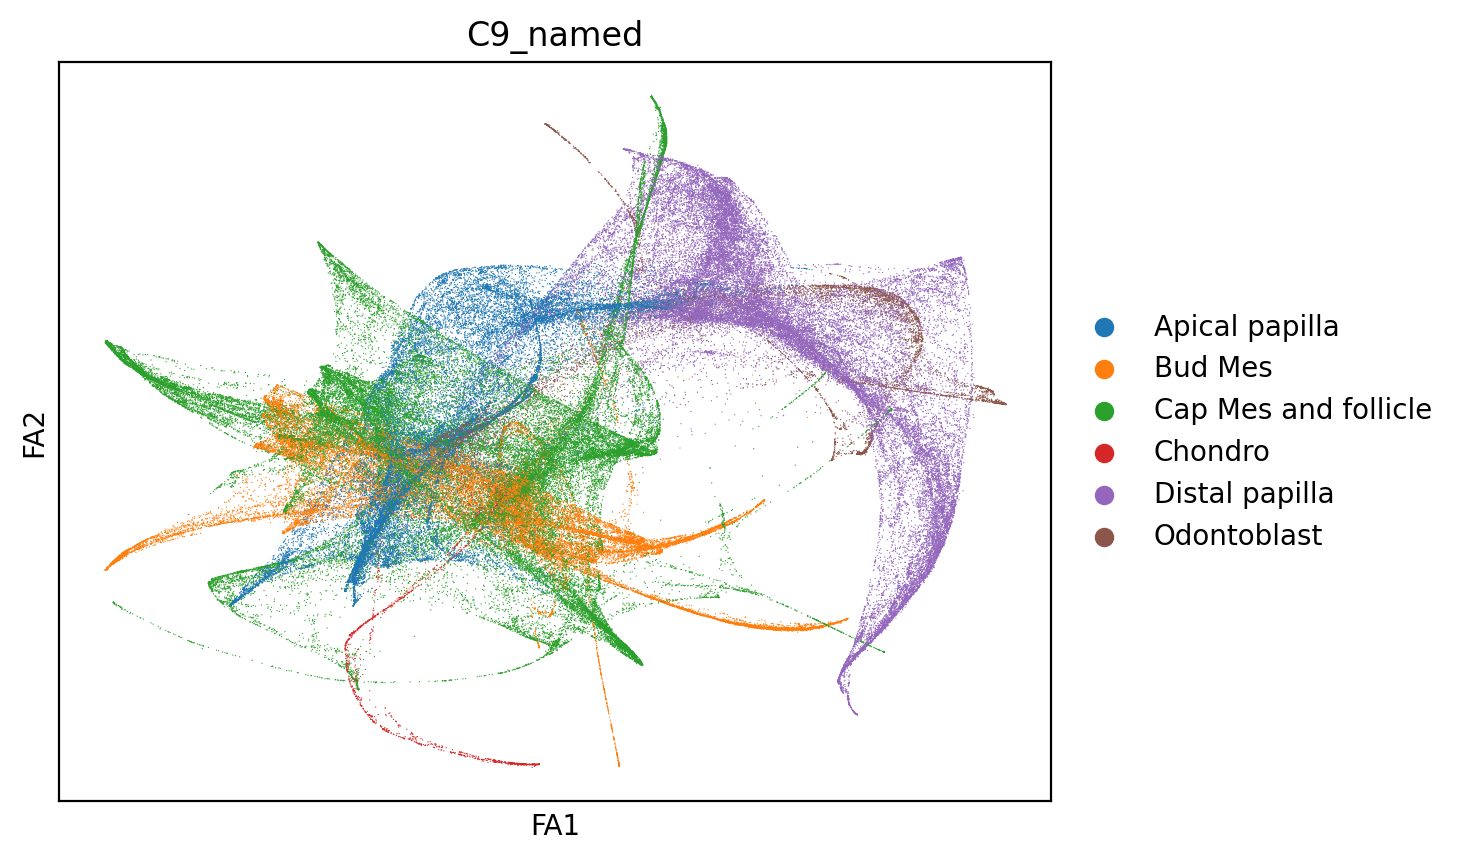

In [28]:
sc.pl.draw_graph(mes,color="C9_named")

In [12]:
diffmapDf = pd.DataFrame(mes.obsm["X_diffmap"])
diffmapDf.index = mes.obs_names

In [32]:
diffmapDf.to_csv("../../processed_data/framework/embedding/20241119_mes_diffmap.csv")

In [13]:
diffmapDf.to_csv("../../processed_data/framework/embedding/20241119_mes_diffmap_10.csv")

In [14]:
mes

AnnData object with n_obs × n_vars = 152988 × 36303
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth.position', 'Histology', 'Sex', 'Gene.Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development.stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related.assay', 'Journal', 'Data.Source', 'Data.location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden', 'anno_level_1', 'Cell_ID', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 'leiden_

In [16]:
pd.DataFrame(mes.uns["diffmap_evals"]).to_csv("../../processed_data/framework/embedding/20241119_mes_diffmap_10_uns_evals.csv")

## Visualize components in diffusion map

We created a function to visualized the components in diffusion map.

In [17]:
def plot_pairwise_pcs(data, groups, n_components=6, sample_size=1000, save_path=None):
    # Create DataFrame
    df = pd.DataFrame(
        data[:, :n_components], 
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    df['Group'] = groups
    
    # Random sampling if needed
    if sample_size and len(df) > sample_size:
        df = df.sample(n=sample_size, random_state=42)
    
    # Create pairplot
    g = sns.pairplot(
        df,
        hue='Group',
        diag_kind='kde',
        plot_kws={'alpha': 0.6, 's': 30},
        height=2
    )
    
    # Save plot if path is provided
    if save_path:
        # Method 1: Save as PNG
        g.savefig(save_path + '.png', dpi=300, bbox_inches='tight')
        
        # Method 2: Save as PDF (better for vector graphics)
        g.savefig(save_path + '.pdf', bbox_inches='tight')
        
        # Method 3: Save as SVG (vector format)
        g.savefig(save_path + '.svg', bbox_inches='tight')
    
    plt.show()
    return g


In [18]:
diffArray = diffmapDf.to_numpy()

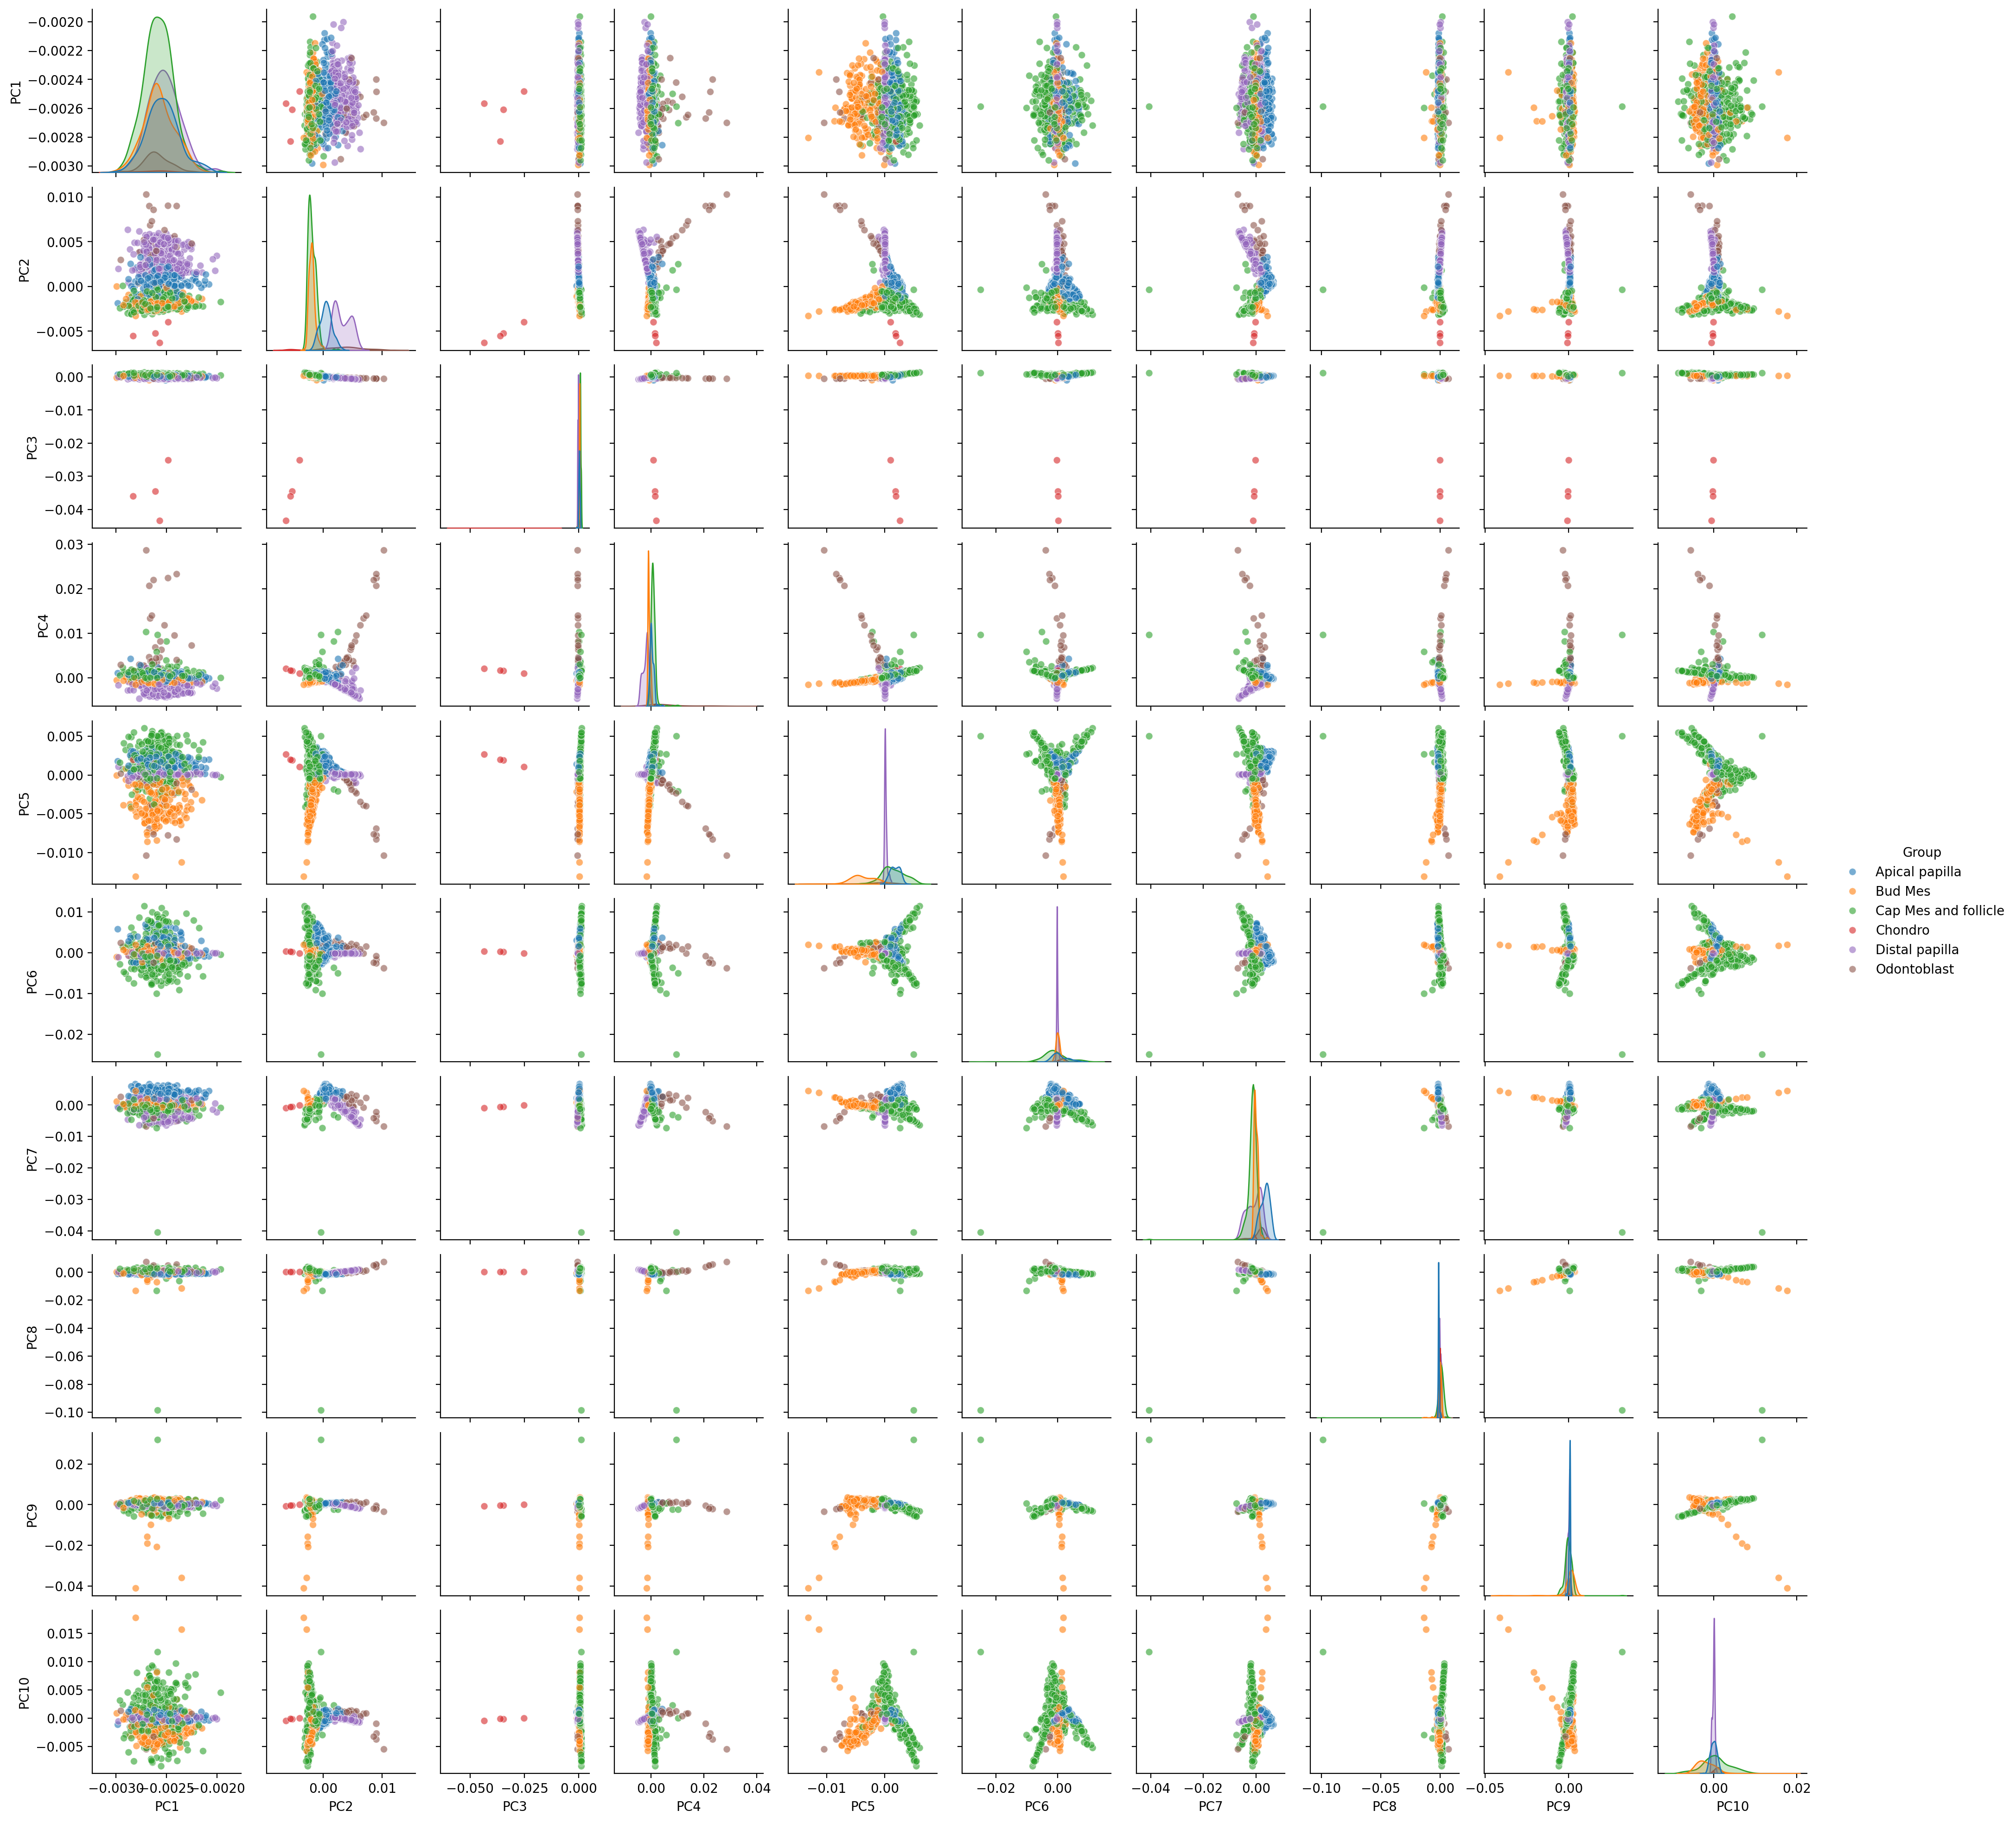

In [26]:
plot_pairwise_pcs(diffArray,mes.obs["C9_named"].values,n_components=10)

In [34]:
drawGraph = pd.DataFrame(mes.obsm["X_draw_graph_fa"])
drawGraph.index = mes.obs_names
diffmapDf.to_csv("../../processed_data/framework/embedding/20241119_mes_diffmap_drawgraph.csv")